In [2]:
from pynwb import NWBHDF5IO; # to read/write
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy import stats;
from tqdm import tqdm;

In [3]:
data_dir = 'E:\\File\\Work\\2024\\Practice_recording_data\\'
nwb_filename = data_dir + 'Link_V4-PFC_cooling.nwb'
with NWBHDF5IO(nwb_filename, 'r') as io:
   nwbfile = io.read();
   units = nwbfile.units.to_dataframe();
   trials = nwbfile.trials.to_dataframe();

In [21]:
from cal_FR import *
temp = units.iloc[0]
temp

session                                               session_00
sess_name                                                l220428
hemisphere                                                    LH
probe                                                     probe0
unitID                                                        14
location                                                      V4
depth                                                       1220
avgWF          [-15.242637362637362, -15.315824175824176, -15...
normWF         [0.0031234957642238986, 0.0031234957642238986,...
spike_times    [18.179833333333335, 25.1715, 25.1737, 32.4072...
spkMtx         [[False, False, False, False, False, False, Fa...
Name: 0, dtype: object

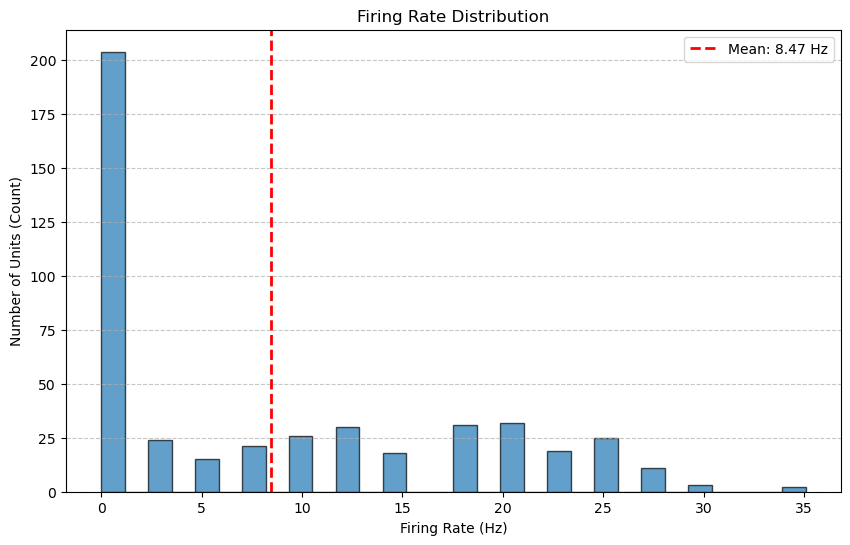

NameError: name 'plot_firing_rate_by_index' is not defined

In [23]:
#check session 00, region V4, time 0-400ms, 
units_target = units[units['session']=='session_00']
units_target = units_target[units_target['location']=='V4']
target_spkMtx = units_target['spkMtx'] #this is a (n,) array, n=unit number, usually 10 - 80. 
target_spkMtx = target_spkMtx[0]
target_spkMtx_fr = []
for each_row in target_spkMtx:
    fr = cal_FR(data = each_row,
                start_time = 999,
                end_time = 1398,
                )
    target_spkMtx_fr.append(fr)
plot_firing_rate_distribution(target_spkMtx_fr)
plot_firing_rate_by_index(target_spkMtx_fr)

In [14]:
target_spkMtx.shape

(32,)

In [12]:
fr = cal_FR(data = each_row,start_time = 999,end_time = 1398,)

In [13]:
each_row

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(461, 2000))